In [15]:
import os
import json
import mne
from celluloid import Camera
import numpy as np
import matplotlib 
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#data_files = [f for f in os.listdir(os.getcwd()) if f.endswith('.json')]
#print(data_files)

In [25]:
class Notion:
    def __init__(self):
        self.ch_names = ['CP5', 'F5', 'C3', 'CP3', 'CP6', 'F6', 'C4', 'CP4']
        self.num_electrodes = len(self.ch_names)
        self.sfreq = 250
        
        
class Data(Notion):
    def __init__(self, x, t):
        self.x = x
        self.t = t
        super().__init__()
        
    @property
    def volts(self):
        return [i * 10e-6 for i in self.x]
    
    @property
    def info(self):
        info = {'ts' : self.t}
        for n, x in zip(self.ch_names, self.volts):
            info[n] = x
        return info
    
def analyse(ax, path, s = 0, delta = 100, scaling = 0.005, sfreq = 250):
    
    # load raw data
    raw = process_data(path, s = s , delta = delta, scale = scaling)
    x_data, x_times = raw[:,:]
    
    print("Num Samples : {} | Min-val : {} | Max-val : {}".format(len(x_times), np.min(x_data), np.max(x_data)))
    
    # plot average
    mean_eeg = np.mean(x_data, axis=0)    
    subset = mean_eeg[int(sfreq * s):int(sfreq * (s+delta))]
    t_subset = x_times[int(sfreq * s):int(sfreq * (s+delta))]
    
    ax.plot(t_subset, subset)
    ax.set_ylim(-scaling,scaling)
    return ax
    
def process_data(path, s = 10, delta = 10.0, scale = 0.0005):
    with open(path, 'r') as f:
        brain_data = json.load(f)
        
    data = []
    for bd in brain_data:
        sample = Data(x = bd['sample'], t = bd['timestamp'])
        data.append(sample.volts)
        
    data = np.array(data).T
    info = mne.create_info(ch_names=sample.ch_names, sfreq=sample.sfreq, ch_types='eeg')
    raw = mne.io.RawArray(data, info)
    raw.filter(1., 42., fir_design='firwin')
    
    # Extract data
    sfreq = raw.info['sfreq']
    fig = plt.figure(dpi = 200)
    for i, n in enumerate(raw.info['ch_names']):
        data, times = raw[i, int(sfreq * s):int(sfreq * (s+delta))]
        
        ax = fig.add_subplot(4, 2, i+1)
        ax.plot(times, np.clip((data.T/scale), -1., 1.))
        ax.set_ylim((-1, 1))
        ax.text(0.1, 0.1, s = 'Electrode : ' + str(n) ,
                fontsize = 6, ha='center',
                transform=ax.transAxes)
    fig.tight_layout()
    plt.show()
    return raw
    

In [26]:
m1 = 'data_S_1601476493_E_1601476527.json'
m2 = 'data_S_1601476532_E_1601476560.json'
m3 = 'data_S_1601476812_E_1601476846.json'
m4 = 'data_S_1601476912_E_1601476956.json'
m5 = 'data_S_1601477064_E_1601477095.json'

dataset = {'m1': m1, 'm2' : m2, 'm3': m3, 'm4' : m4,'m5' : m5}


Creating RawArray with float64 data, n_channels=8, n_times=8300
    Range : 0 ... 8299 =      0.000 ...    33.196 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 42 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 42.00 Hz
- Upper transition bandwidth: 10.50 Hz (-6 dB cutoff frequency: 47.25 Hz)
- Filter length: 825 samples (3.300 sec)



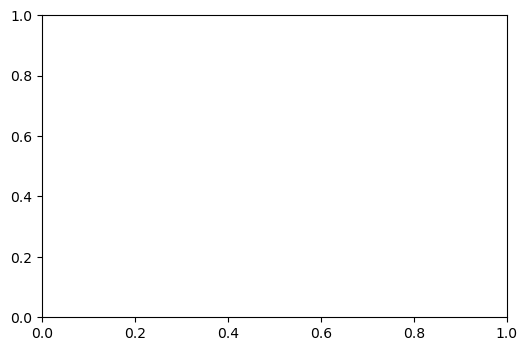

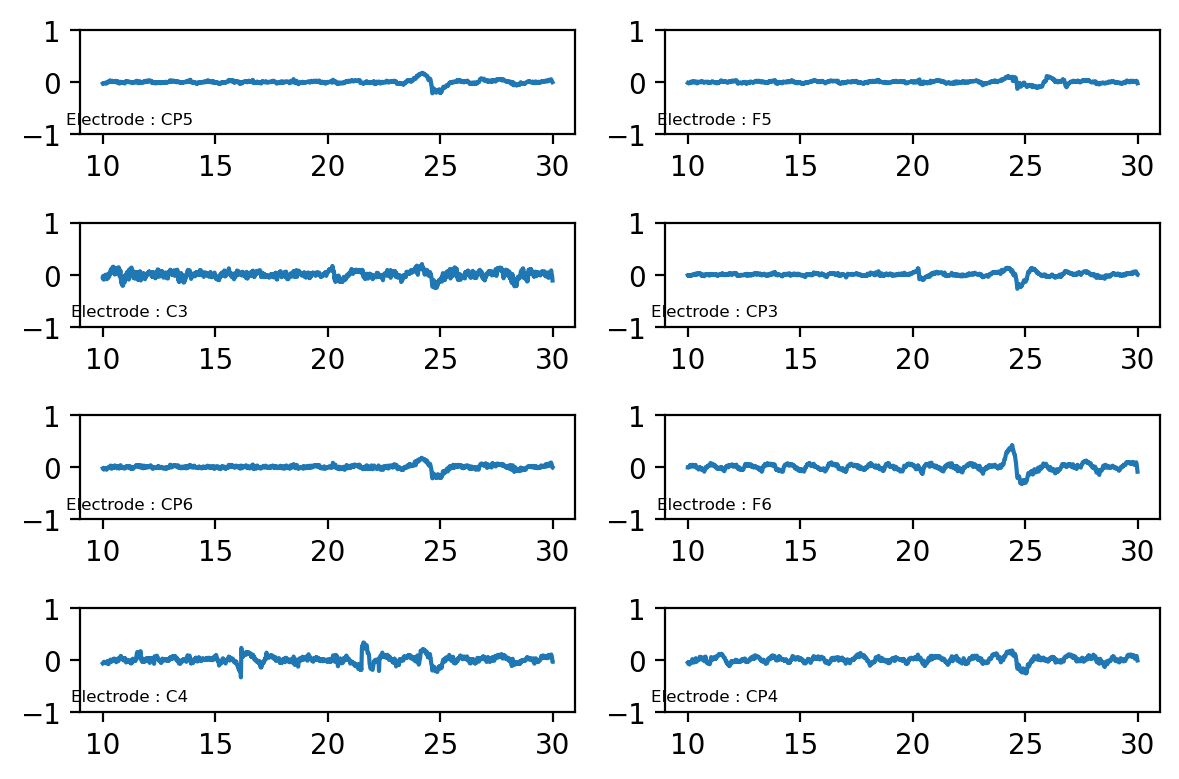

Num Samples : 8300 | Min-val : -0.002455726810786509 | Max-val : 0.0021131759425852183
Creating RawArray with float64 data, n_channels=8, n_times=7075
    Range : 0 ... 7074 =      0.000 ...    28.296 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 42 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 42.00 Hz
- Upper transition bandwidth: 10.50 Hz (-6 dB cutoff frequency: 47.25 Hz)
- Filter length: 825 samples (3.300 sec)



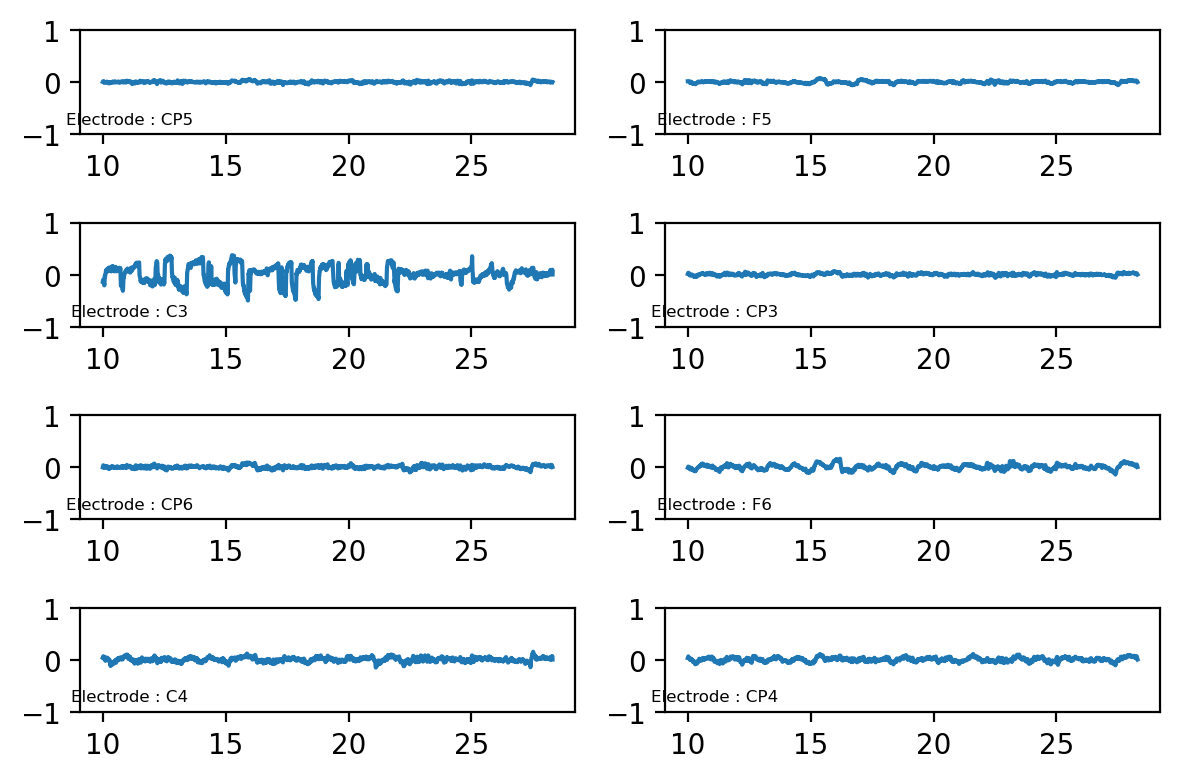

Num Samples : 7075 | Min-val : -0.0024969878295536723 | Max-val : 0.0018988792077642355
Creating RawArray with float64 data, n_channels=8, n_times=8300
    Range : 0 ... 8299 =      0.000 ...    33.196 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 42 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 42.00 Hz
- Upper transition bandwidth: 10.50 Hz (-6 dB cutoff frequency: 47.25 Hz)
- Filter length: 825 samples (3.300 sec)



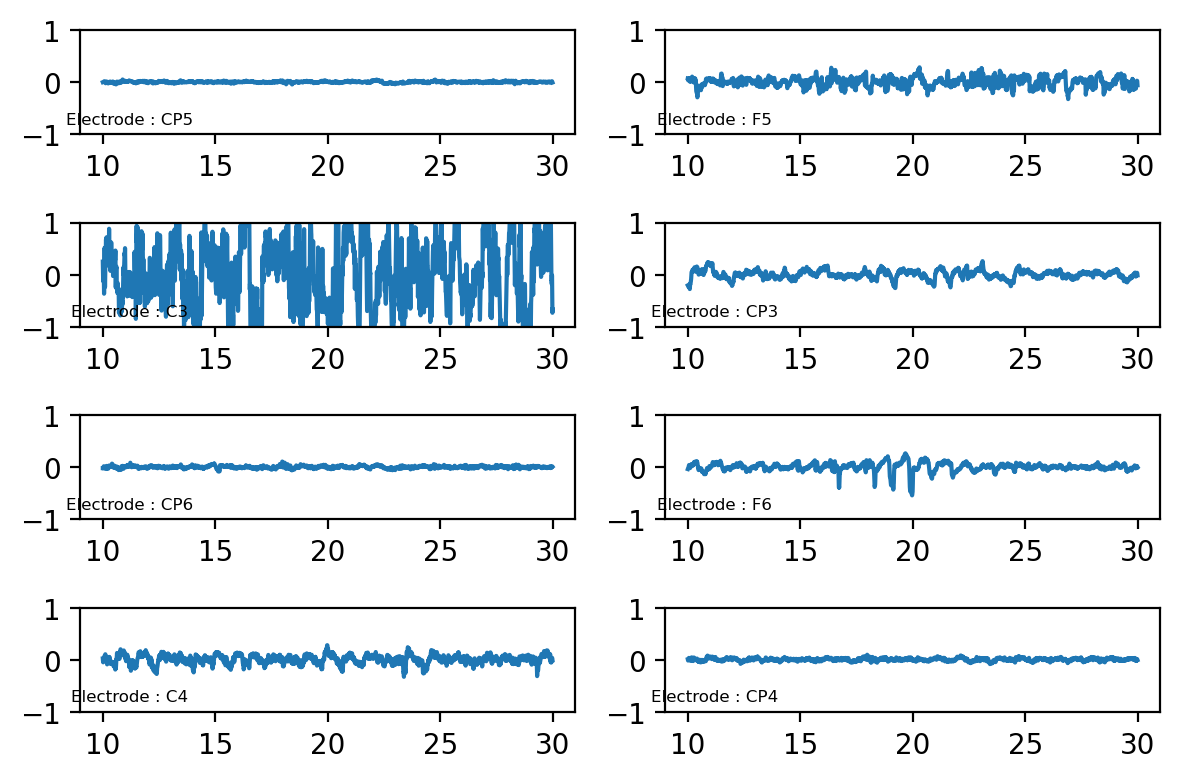

Num Samples : 8300 | Min-val : -0.012060628958030499 | Max-val : 0.011633895120505318
Creating RawArray with float64 data, n_channels=8, n_times=10875
    Range : 0 ... 10874 =      0.000 ...    43.496 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 42 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 42.00 Hz
- Upper transition bandwidth: 10.50 Hz (-6 dB cutoff frequency: 47.25 Hz)
- Filter length: 825 samples (3.300 sec)



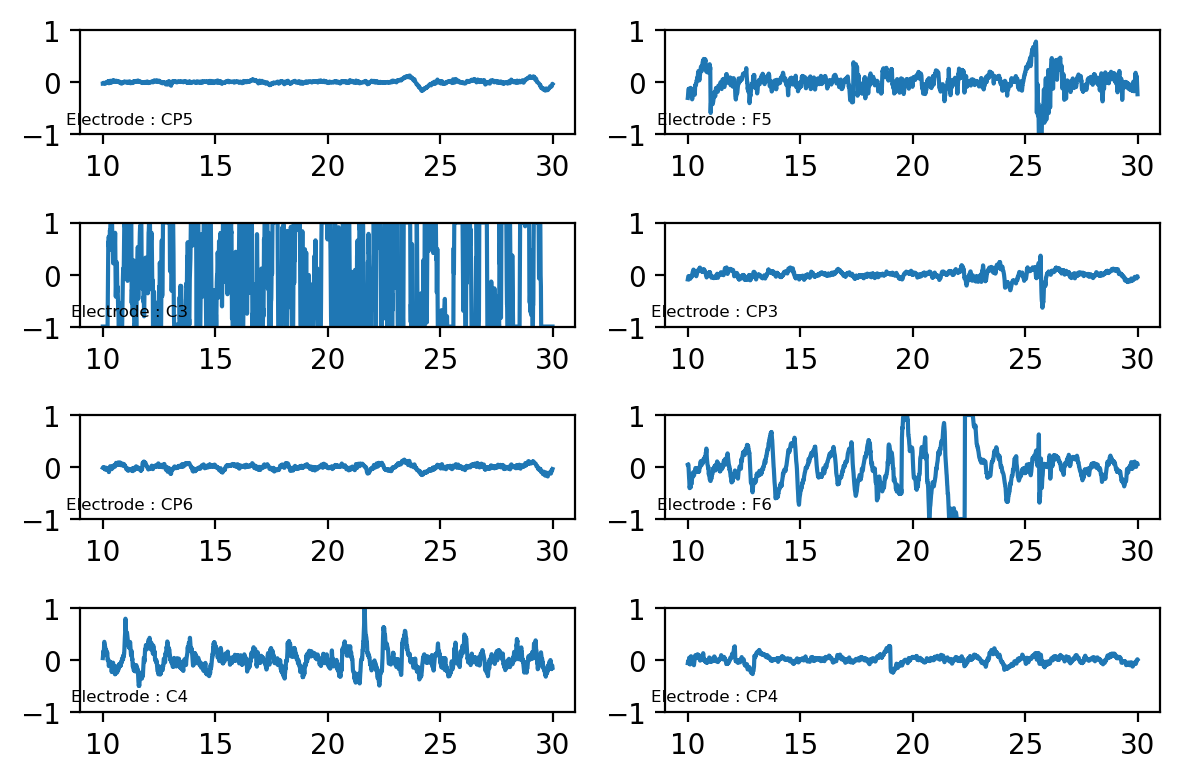

Num Samples : 10875 | Min-val : -0.05259663883591259 | Max-val : 0.08258301308248059
Creating RawArray with float64 data, n_channels=8, n_times=7725
    Range : 0 ... 7724 =      0.000 ...    30.896 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 42 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 42.00 Hz
- Upper transition bandwidth: 10.50 Hz (-6 dB cutoff frequency: 47.25 Hz)
- Filter length: 825 samples (3.300 sec)



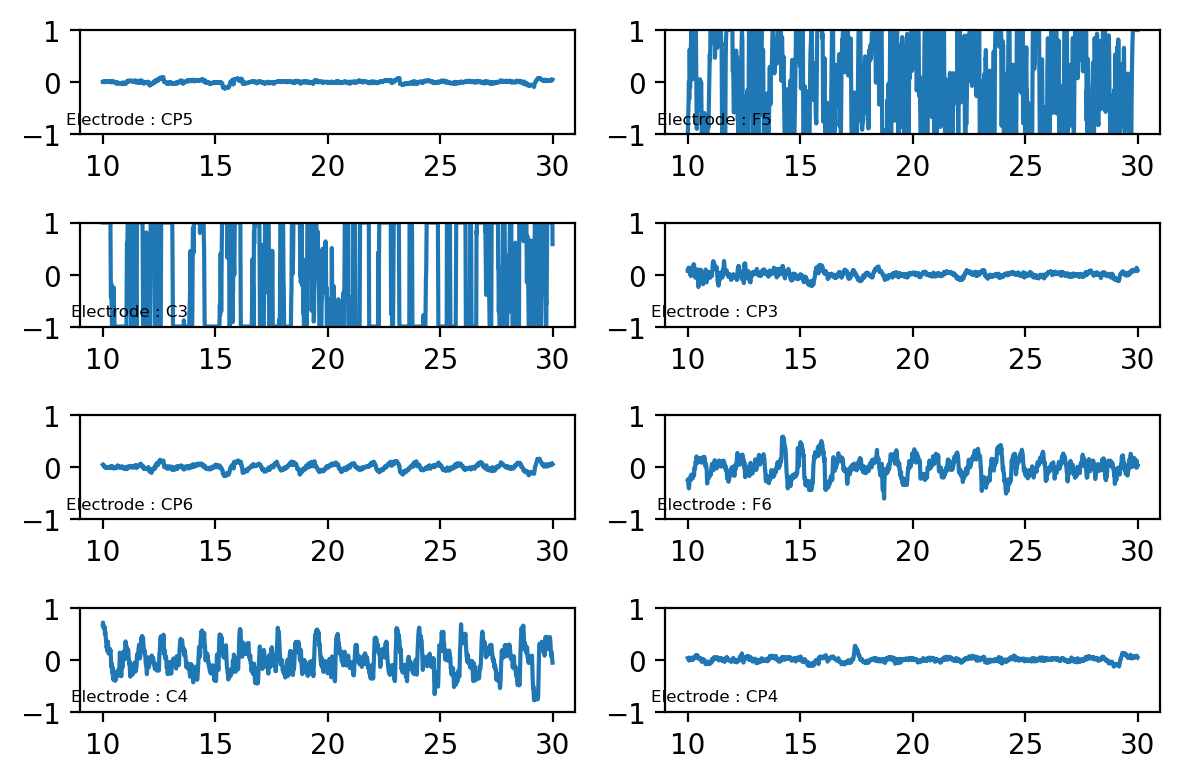

Num Samples : 7725 | Min-val : -0.08366647209397639 | Max-val : 0.0988362776822427


In [27]:
fig, ax = plt.subplots(1, dpi = 100)
cam = Camera(fig)
for n, p in dataset.items():
    ax = analyse(ax, p, s = 10, delta = 20, scaling = 0.005)
    ax.text(0.1, 0.9, s = n,
                fontsize = 6, ha='center',
                transform=ax.transAxes)
    cam.snap()

In [28]:
animation = cam.animate()

In [29]:
HTML(animation.to_html5_video())

In [37]:
animation.save('demo_successive_average_eeg.mp4', fps = 1)